In [90]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import urllib.request as req
import time
import folium
import geopandas as gpd
import html5lib as html

In [91]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [92]:
jeju_sales = pd.read_csv("../JejuData/jeju_sales.csv")
jeju_sales

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,연도,월,권역
0,2017-01,서귀포시,읍면,안덕면,G47121,슈퍼마켓,제주도민,도민,30.0,남성,1527890,214,소매업,2017,1,서귀포시 서부권역
1,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,내국인,개별,70.0,남성,630000,275,음식점업,2017,1,서귀포시 동권역
2,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,제주도민,도민,70.0,남성,10790000,275,음식점업,2017,1,서귀포시 동권역
3,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,제주도민,도민,70.0,여성,684000,275,음식점업,2017,1,서귀포시 동권역
4,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,제주도민,도민,60.0,남성,39547110,275,음식점업,2017,1,서귀포시 동권역
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846301,2021-05,서귀포시,읍면,남원읍,G47121,슈퍼마켓,제주도민,도민,10.0,여성,14150,189,소매업,2021,5,서귀포시 동부권역
2846302,2021-05,서귀포시,도심,하효동,G47121,슈퍼마켓,내국인,단체,50.0,여성,9100,189,소매업,2021,5,서귀포시 동권역
2846303,2021-05,서귀포시,도심,하예동,G47121,슈퍼마켓,제주도민,도민,20.0,여성,7800,189,소매업,2021,5,서귀포시 동권역
2846304,2021-05,서귀포시,도심,서홍동,G47121,슈퍼마켓,내국인,단체,40.0,남성,10900,189,소매업,2021,5,서귀포시 동권역


In [93]:
jeju_sales['이용자 구분'].unique()

array(['제주도민', '내국인'], dtype=object)

In [94]:
jeju_sales_tourists = jeju_sales[jeju_sales['이용자 구분'] == '내국인']
jeju_sales_tourists

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,연도,월,권역
1,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,내국인,개별,70.0,남성,630000,275,음식점업,2017,1,서귀포시 동권역
7,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,내국인,단체,50.0,남성,25925000,275,음식점업,2017,1,서귀포시 동권역
8,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,내국인,개별,40.0,여성,3200500,275,음식점업,2017,1,서귀포시 동권역
10,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,내국인,단체,70.0,남성,2495000,275,음식점업,2017,1,서귀포시 동권역
11,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,내국인,단체,20.0,여성,606000,275,음식점업,2017,1,서귀포시 동권역
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846296,2021-05,서귀포시,도심,상효동,G47121,슈퍼마켓,내국인,단체,10.0,남성,82210,189,소매업,2021,5,서귀포시 동권역
2846300,2021-05,서귀포시,도심,월평동,G47121,슈퍼마켓,내국인,개별,40.0,남성,14000,189,소매업,2021,5,서귀포시 동권역
2846302,2021-05,서귀포시,도심,하효동,G47121,슈퍼마켓,내국인,단체,50.0,여성,9100,189,소매업,2021,5,서귀포시 동권역
2846304,2021-05,서귀포시,도심,서홍동,G47121,슈퍼마켓,내국인,단체,40.0,남성,10900,189,소매업,2021,5,서귀포시 동권역


In [95]:
jeju_sales_tourists['업종명 대분류'].unique()

array(['음식점업', '소매업', '서비스업', '숙박업', '임대업', '운송업'], dtype=object)

In [96]:
jeju_sales_tourists['업종명'].unique()

array(['일반유흥 주점업', '화장품 및 방향제 소매업', '기타 주점업', '욕탕업', '호텔업', '건강보조식품 소매업',
       '자동차 임대업', '기타음식료품위주종합소매업', '슈퍼마켓', '골프장 운영업', '마사지업',
       '기타 수상오락 서비스업', '그외 기타 분류안된 오락관련 서비스업', '면세점', '내항 여객 운송업',
       '관광 민예품 및 선물용품 소매업', '여행사업', '여관업', '비알콜 음료점업',
       '스포츠 및 레크레이션 용품 임대업', '기타 대형 종합 소매업', '그외 기타 스포츠시설 운영업',
       '전시 및 행사 대행업', '육류 소매업', '체인화 편의점', '수산물 소매업', '과실 및 채소 소매업',
       '빵 및 과자류 소매업', '차량용 주유소 운영업', '그외 기타 종합 소매업', '서양식 음식점업',
       '기타 외국식 음식점업', '일식 음식점업', '피자, 햄버거, 샌드위치 및 유사 음식점업', '한식 음식점업',
       '휴양콘도 운영업', '차량용 가스 충전업', '중식 음식점업', '정기 항공 운송업', '기타 갬블링 및 베팅업'],
      dtype=object)

In [97]:
total_tourists = pd.read_csv("../JejuData/total_ordered_transposed.csv")
total_tourists.head()

,index,서귀포시 동권역,서귀포시 동부권역,서귀포시 서부권역,제주시 동권역,제주시 동부권역,제주시 서부권역
0,2019년 01월,1958171,1257806,812809,3647194,1005777,1186060
1,2019년 02월,1788516,1135807,752514,3412394,926442,1090450
2,2019년 03월,1761859,1207840,800139,3528180,1097106,1211185
3,2019년 04월,1956400,1397623,936671,3778284,1258647,1374969
4,2019년 05월,2254186,1458903,972925,3975993,1366838,1479163


In [98]:
foreigner_tourists = pd.read_csv("../JejuData/foreigner_ordered_transposed.csv")
foreigner_tourists.tail()

,index,서귀포시 동권역,서귀포시 동부권역,서귀포시 서부권역,제주시 동권역,제주시 동부권역,제주시 서부권역
42,2022년 07월,3537,739,1763,6770,786,2394
43,2022년 08월,4639,891,2474,10095,1368,2770
44,2022년 09월,3998,891,1345,8983,1252,2016
45,2022년 10월,9358,1283,2646,10243,1144,3059
46,2022년 11월,4927,1082,1615,8200,832,1761


In [99]:
import pandas as pd
from glob import glob

file_names = glob("../JejuData/인기관광지순위_외지인_2018년1월~2022년12월/*.csv") # 폴더 내의 모든 csv파일 목록을 불러온다
total = pd.DataFrame() # 빈 데이터프레임 하나를 생성한다
i = 1
j = 2018
for file_name in file_names:
    temp = pd.read_csv(file_name, encoding='euc-kr') # csv파일을 하나씩 열어 임시 데이터프레임으로 생성한다
    temp['년'] = j
    temp['월'] = i
    total = pd.concat([total, temp]) # 전체 데이터프레임에 추가하여 넣는다
    i += 1
    if i == 13:
        i = 1
        j = j + 1

total

,순위,관광지명,주소,분류,외지인 검색 수,년,월
0,1,제주국제공항,제주 제주시 공항로 2-0,교통시설,48819,2018,1
1,2,동문재래시장,제주 제주시 관덕로14길 20-0,시장,25046,2018,1
2,3,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0,시장,22406,2018,1
3,4,성산일출봉,제주 서귀포시 일출로 284-12,자연경관(산),16069,2018,1
4,5,아르떼뮤지엄제주,제주 제주시 어림비로 478-0,전시시설,12474,2018,1
...,...,...,...,...,...,...,...
95,96,골든튤립제주성산호텔,제주 서귀포시 일출로 31-0,호텔,1337,2022,12
96,97,표선해수욕장,제주 서귀포시,자연경관(하천/해양),1334,2022,12
97,98,한라산둘레길사려니숲길,제주 제주시,기타레저스포츠,1303,2022,12
98,99,외돌개,제주 서귀포시,기타관광,1298,2022,12


In [100]:
total[total['년'] == 2018]
total[total['년'] == 2019]
total[total['년'] == 2020]
total[total['년'] == 2021]
total[total['년'] == 2022]

,순위,관광지명,주소,분류,외지인 검색 수,년,월
0,1,제주국제공항,제주 제주시 공항로 2-0,교통시설,28423,2022,1
1,2,동문재래시장,제주 제주시 관덕로14길 20-0,시장,13323,2022,1
2,3,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0,시장,12127,2022,1
3,4,성산일출봉,제주 서귀포시 일출로 284-12,자연경관(산),7835,2022,1
4,5,함덕해수욕장,제주 제주시 조함해안로 525-0,자연경관(하천/해양),6380,2022,1
...,...,...,...,...,...,...,...
95,96,골든튤립제주성산호텔,제주 서귀포시 일출로 31-0,호텔,1337,2022,12
96,97,표선해수욕장,제주 서귀포시,자연경관(하천/해양),1334,2022,12
97,98,한라산둘레길사려니숲길,제주 제주시,기타레저스포츠,1303,2022,12
98,99,외돌개,제주 서귀포시,기타관광,1298,2022,12


In [101]:
# total.to_csv("../JejuData/tourism_spots_top100.csv",index=False)

In [102]:
tourism_spots_top100 = pd.read_csv("../JejuData/tourism_spots_top100.csv")

In [103]:
tourism_spots_top100

,년,월,순위,외지인 검색 수,분류,관광지명,주소
0,2018,1,1,48819,교통시설,제주국제공항,제주 제주시 공항로 2-0
1,2018,1,2,25046,시장,동문재래시장,제주 제주시 관덕로14길 20-0
2,2018,1,3,22406,시장,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0
3,2018,1,4,16069,자연경관(산),성산일출봉,제주 서귀포시 일출로 284-12
4,2018,1,5,12474,전시시설,아르떼뮤지엄제주,제주 제주시 어림비로 478-0
...,...,...,...,...,...,...,...
5995,2022,12,96,1337,호텔,골든튤립제주성산호텔,제주 서귀포시 일출로 31-0
5996,2022,12,97,1334,자연경관(하천/해양),표선해수욕장,제주 서귀포시
5997,2022,12,98,1303,기타레저스포츠,한라산둘레길사려니숲길,제주 제주시
5998,2022,12,99,1298,기타관광,외돌개,제주 서귀포시


In [104]:
tourism_spots_top100 = tourism_spots_top100[['년','월','순위','외지인 검색 수','분류','관광지명','주소']]
tourism_spots_top100

,년,월,순위,외지인 검색 수,분류,관광지명,주소
0,2018,1,1,48819,교통시설,제주국제공항,제주 제주시 공항로 2-0
1,2018,1,2,25046,시장,동문재래시장,제주 제주시 관덕로14길 20-0
2,2018,1,3,22406,시장,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0
3,2018,1,4,16069,자연경관(산),성산일출봉,제주 서귀포시 일출로 284-12
4,2018,1,5,12474,전시시설,아르떼뮤지엄제주,제주 제주시 어림비로 478-0
...,...,...,...,...,...,...,...
5995,2022,12,96,1337,호텔,골든튤립제주성산호텔,제주 서귀포시 일출로 31-0
5996,2022,12,97,1334,자연경관(하천/해양),표선해수욕장,제주 서귀포시
5997,2022,12,98,1303,기타레저스포츠,한라산둘레길사려니숲길,제주 제주시
5998,2022,12,99,1298,기타관광,외돌개,제주 서귀포시


In [105]:
tourism_spots_top100.to_csv("../JejuData/tourism_spots_top100.csv",index=False)

In [106]:
tourism_spots_top100

,년,월,순위,외지인 검색 수,분류,관광지명,주소
0,2018,1,1,48819,교통시설,제주국제공항,제주 제주시 공항로 2-0
1,2018,1,2,25046,시장,동문재래시장,제주 제주시 관덕로14길 20-0
2,2018,1,3,22406,시장,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0
3,2018,1,4,16069,자연경관(산),성산일출봉,제주 서귀포시 일출로 284-12
4,2018,1,5,12474,전시시설,아르떼뮤지엄제주,제주 제주시 어림비로 478-0
...,...,...,...,...,...,...,...
5995,2022,12,96,1337,호텔,골든튤립제주성산호텔,제주 서귀포시 일출로 31-0
5996,2022,12,97,1334,자연경관(하천/해양),표선해수욕장,제주 서귀포시
5997,2022,12,98,1303,기타레저스포츠,한라산둘레길사려니숲길,제주 제주시
5998,2022,12,99,1298,기타관광,외돌개,제주 서귀포시


In [107]:
tourism_spot = pd.read_csv("../Data/제주특별자치도_관내_관광지데이터_20221201.csv")
tourism_spot

,연번,관광지명,관광지 분야,관광지 구분,소재지도로명주소,소재지지번주소,위도,경도,면적,공공편익시설정보,숙박시설정보,지정일자,수용인원수,주차가능수,관광지소개,관리기관전화번호,관리기관명,데이터기준일자
0,1,1100고지(휴게소),자연,관광지,제주특별자치도 서귀포시 1100로 1555,제주특별자치도 서귀포시 색달동 산1-3,33.357773,126.462520,230,안내소+주차장+화장실,펜션,NaN,115.0,40,한라산 정상을 동쪽에 끼고 제주시와 서귀포시를 잇는 산간도로 1100로는 제주도 최...,064-713-9950,한라산국립공원,2022-12-01
1,2,1100고지습지,자연,관광지,제주특별자치도 서귀포시 1100로 1555,제주특별자치도 서귀포시 색달동 산 1-2,33.357619,126.463057,22794,안내소+주차장+화장실,펜션,NaN,4955.0,40,1100고지 습지는 한라산 고원지대에 형성된 대표적인 산지습지로서 16개 이상의 습...,064-713-9950,한라산국립공원,2022-12-01
2,3,1112도로,자연,관광지,제주특별자치도 제주시 명림로 584,제주특별자치도 제주시 봉개동 산78-1,33.439260,126.628326,297000,NaN,리조트,NaN,6465.0,NaN,대한민국에서 가장 아름다운 도로 중 하나로 길 양 옆으로 하늘로 곧게 뻗은 삼나무들...,064-712-6988,제주특별자치도청,2022-12-01
3,4,4.3해원방사탑,문화,관광지,제주특별자치도 제주시 신산로 82,제주특별자치도 제주시 일도이동 837-20,33.505213,126.534893,1179,안내소+주차장+화장실,호텔+게스트하우스,1998-04-03,256.0,70,"제주도에는 예로부터 마을 어느 한 방위에 불길한 징조가 있거나, 풍수지리설에 따라 ...",064-712-6988,제주특별자치도청,2022-12-01
4,5,5.16도로숲터널,자연,관광지,제주특별자치도 서귀포시 516로,제주특별자치도 서귀포시 남원읍 신례리 산 2-1,33.361754,126.622834,12000,NaN,NaN,NaN,2609.0,NaN,5.16 도로를 지나면 도로 양쪽 나무가 아치형으로 도로를 감싸는 울창한 나무 터널...,064-710-8590,제주특별자치도도로관리과,2022-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,1043,후포해변,자연,관광지,제주특별자치도 제주시 추자면 대서리 267,제주특별자치도 제주시 추자면 대서5길 87,33.962368,126.289403,NaN,NaN,호텔+펜션+게스트하우스+민박,NaN,NaN,NaN,탈의실과 편의시설을 갖춘 작은 휴양지,064-740-6000,제주특별자치도청,2022-12-01
1043,1044,훈데르트바서파크,기타,관광지,제주특별자치도 제주시 우도면 우도해안길 32-12,NaN,33.507434,126.954269,NaN,NaN,NaN,NaN,NaN,NaN,"훈데르트바서파크는 오스트리아 3대 화가이자 환경 운동가, 건축 치료사 ‘훈데르트바서...",064-710-2114,제주특별자치도청,2022-12-01
1044,1045,휴애리 매화축제,축제,관광지,제주특별자치도 서귀포시 남원읍 신례리 2081,제주특별자치도 서귀포시 남원읍 신례동로 256,33.308964,126.633806,52942,주차장,게스트하우스+관광호텔,NaN,11509.0,50,매화 꽃 향기와 함께 봄의 시작을 알리는 제주 대표 봄 축제,064-732-2114,제주특별자치도청,2022-12-01
1045,1046,휴애리 자연생활공원,생태공원,관광지,"제주특별자치도 서귀포시 남원읍 신례동로 256 (신례리, 휴애리)",제주특별자치도 제주시 우도면 연평리 24731,33.308757,126.633794,46000,공용주차장+현금결제+카드결제+화장실+무료 WIFI+편의점+음료대+유도 및 안내시설+...,호텔+펜션+게스트하우스,NaN,10000.0,NaN,자연속 동·식물들과 교감이 있는 체험형 자연생활공원,064-762-2190,㈜휴에리,2022-12-01


In [108]:
card_business_sex = pd.read_csv("../JejuData/업종별성별카드이용정보.csv")

In [109]:
card_business_sex

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
0,201801,건강보조식품 소매업,기타외국,알수없음,65,78,101523250
1,201801,건강보조식품 소매업,내국인,남성,159,165,25558470
2,201801,건강보조식품 소매업,내국인,알수없음,1,1,396000
3,201801,건강보조식품 소매업,내국인,여성,200,218,32041740
4,201801,건강보조식품 소매업,동남아,알수없음,8,8,1550000
...,...,...,...,...,...,...,...
13221,202109,휴양콘도 운영업,내국인,여성,4139,4870,548884346
13222,202109,휴양콘도 운영업,법인,알수없음,1845,3838,1441503333
13223,202109,휴양콘도 운영업,제주도민,남성,741,873,49421248
13224,202109,휴양콘도 운영업,제주도민,여성,743,894,52177033


In [110]:
card_business_sex['이용자구분'].unique()

array(['기타외국', '내국인', '동남아', '법인', '일본', '제주도민', '중국'], dtype=object)

In [111]:
card_business_sex['업종명'].unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업',
       '기타 갬블링 및 베팅업', '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '버스 운송업',
       '비알콜 음료점업', '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓',
       '스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업',
       '일식 음식점업', '자동차 임대업', '전시 및 행사 대행업', '정기 항공 운송업', '중식 음식점업',
       '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자, 햄버거, 샌드위치 및 유사 음식점업',
       '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '택시 운송업'],
      dtype=object)

In [112]:
card_business_sex['연월'].unique()

array([201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808,
       201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904,
       201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912,
       202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008,
       202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104,
       202105, 202106, 202107, 202108, 202109])

---
### 내국인과 중국인 관광객의 이용자수, 이용건수, 이용금액만 조회

In [113]:
card_local_chinese = card_business_sex[(card_business_sex['이용자구분']=='내국인')|(card_business_sex['이용자구분']=='중국')]

In [114]:
card_local_chinese

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
1,201801,건강보조식품 소매업,내국인,남성,159,165,25558470
2,201801,건강보조식품 소매업,내국인,알수없음,1,1,396000
3,201801,건강보조식품 소매업,내국인,여성,200,218,32041740
9,201801,건강보조식품 소매업,중국,알수없음,4,4,1804000
11,201801,골프장 운영업,내국인,남성,3217,3411,533169179
...,...,...,...,...,...,...,...
13215,202109,화장품 및 방향제 소매업,내국인,여성,1803,2091,55314280
13219,202109,화장품 및 방향제 소매업,중국,알수없음,6,7,432900
13220,202109,휴양콘도 운영업,내국인,남성,5314,6148,825985721
13221,202109,휴양콘도 운영업,내국인,여성,4139,4870,548884346


In [115]:
card_local_chinese['업종명'].unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업',
       '기타 대형 종합 소매업', '기타 수상오락 서비스업', '기타 외국식 음식점업', '기타 주점업',
       '기타음식료품위주종합소매업', '내항 여객 운송업', '마사지업', '면세점', '비알콜 음료점업',
       '빵 및 과자류 소매업', '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업',
       '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업', '자동차 임대업',
       '전시 및 행사 대행업', '정기 항공 운송업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업',
       '체인화 편의점', '피자, 햄버거, 샌드위치 및 유사 음식점업', '한식 음식점업', '호텔업',
       '화장품 및 방향제 소매업', '휴양콘도 운영업', '버스 운송업', '택시 운송업'], dtype=object)

In [116]:
card_by_category = card_local_chinese[card_local_chinese['업종명'].isin(['기타 수상오락 서비스업','관광 민예품 및 선물용품 소매업','그외 기타 분류안된 오락관련 서비스업','비알콜 음료점업','스포츠 및 레크레이션 용품 임대업', '빵 및 과자류 소매업', '서양식 음식점업', '기타 외국식 음식점업', '일식 음식점업','피자, 햄버거, 샌드위치 및 유사 음식점업','한식 음식점업','중식 음식점업'])]

In [117]:
card_by_category.to_csv("../JejuData/card_by_category.csv",index=False)

In [118]:
card_by_category

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
26,201801,관광 민예품 및 선물용품 소매업,내국인,남성,8689,9383,313332360
27,201801,관광 민예품 및 선물용품 소매업,내국인,알수없음,5,5,467000
28,201801,관광 민예품 및 선물용품 소매업,내국인,여성,10345,11246,330131900
33,201801,관광 민예품 및 선물용품 소매업,중국,알수없음,5,5,1207250
34,201801,그외 기타 분류안된 오락관련 서비스업,내국인,남성,39,43,2346000
...,...,...,...,...,...,...,...
13188,202109,"피자, 햄버거, 샌드위치 및 유사 음식점업",내국인,여성,14018,15014,181833720
13194,202109,"피자, 햄버거, 샌드위치 및 유사 음식점업",중국,알수없음,14,18,245000
13196,202109,한식 음식점업,내국인,남성,139751,146012,5716491308
13197,202109,한식 음식점업,내국인,여성,105496,110259,4045019182


In [119]:
card_by_category.groupby(['연월','업종명']).sum()

이용자수    이용건수        이용금액
연월     업종명                                                
201801 관광 민예품 및 선물용품 소매업         19044   20639   645138510
       그외 기타 분류안된 오락관련 서비스업         64      68     3554000
       기타 수상오락 서비스업                 11      11     1588000
       기타 외국식 음식점업                5227    5383   183726740
       비알콜 음료점업                  42758   45865   472879610
...                                ...     ...         ...
202109 스포츠 및 레크레이션 용품 임대업         7669    8468   496478599
       일식 음식점업                   16394   16860   999569986
       중식 음식점업                   11289   11763   276323414
       피자, 햄버거, 샌드위치 및 유사 음식점업   31688   33900   409759219
       한식 음식점업                  245298  256330  9764909690

[540 rows x 3 columns]

In [120]:
card_by_category

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
26,201801,관광 민예품 및 선물용품 소매업,내국인,남성,8689,9383,313332360
27,201801,관광 민예품 및 선물용품 소매업,내국인,알수없음,5,5,467000
28,201801,관광 민예품 및 선물용품 소매업,내국인,여성,10345,11246,330131900
33,201801,관광 민예품 및 선물용품 소매업,중국,알수없음,5,5,1207250
34,201801,그외 기타 분류안된 오락관련 서비스업,내국인,남성,39,43,2346000
...,...,...,...,...,...,...,...
13188,202109,"피자, 햄버거, 샌드위치 및 유사 음식점업",내국인,여성,14018,15014,181833720
13194,202109,"피자, 햄버거, 샌드위치 및 유사 음식점업",중국,알수없음,14,18,245000
13196,202109,한식 음식점업,내국인,남성,139751,146012,5716491308
13197,202109,한식 음식점업,내국인,여성,105496,110259,4045019182


In [121]:
business_dong = pd.read_csv("../JejuData/관광관련업종정보_읍면동별업종별사업체수.csv",encoding='euc-kr')

In [122]:
business_dong

,법정동,법정동코드,업종구분소분류,사업체수
0,일도일동,50110101,관광객이용시설업,0
1,일도일동,50110101,국제회의업,0
2,일도일동,50110101,관광숙박업,1
3,일도일동,50110101,여행업,2
4,일도일동,50110101,카지노업,0
...,...,...,...,...
439,표선면,50130320,국제회의업,0
440,표선면,50130320,관광숙박업,5
441,표선면,50130320,여행업,1
442,표선면,50130320,카지노업,0


In [123]:
jeju_sales_category = pd.read_csv("../JejuData/jeju_sales_category.csv")
jeju_sales_category

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,연도,월
0,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,개별,40.0,남성,450000,11,서비스업,2017,1
1,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,개별,30.0,남성,715000,11,서비스업,2017,1
2,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,도민,60.0,여성,134000,134,소매업,2017,1
3,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,도민,50.0,남성,81500,134,소매업,2017,1
4,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,도민,30.0,남성,72500,134,소매업,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779883,2021-05,제주시,도심,오라일동,I56111,한식 음식점업,제주도민,도민,70.0,여성,4455100,6855,음식점업,2021,5
779884,2021-05,제주시,읍면,조천읍,I56111,한식 음식점업,제주도민,도민,20.0,여성,9491800,6855,음식점업,2021,5
779885,2021-05,제주시,도심,도련이동,I56111,한식 음식점업,내국인,단체,70.0,남성,36000,6855,음식점업,2021,5
779886,2021-05,제주시,도심,외도이동,I56111,한식 음식점업,내국인,개별,70.0,남성,67000,6855,음식점업,2021,5


In [124]:
jeju_sales_category[(jeju_sales_category['이용자 구분']=='내국인')&(jeju_sales_category['연도']==2017)].groupby(['월','업종명']).sum()['이용금액']

월   업종명              
1   관광 민예품 및 선물용품 소매업      820378260
    기타 수상오락 서비스업             2330000
    기타 외국식 음식점업            297984390
    서양식 음식점업              2093844238
    일식 음식점업               2317427744
                            ...     
12  기타 외국식 음식점업            319940880
    서양식 음식점업              2620388106
    일식 음식점업               2497713188
    중식 음식점업                555779112
    한식 음식점업              21538658524
Name: 이용금액, Length: 84, dtype: int64

In [125]:
df = jeju_sales_category[(jeju_sales_category['이용자 구분']=='내국인')&(jeju_sales_category['연도']==2017)].groupby(['월','업종명']).sum()['이용금액']

In [126]:
jeju_sales_category[(jeju_sales_category['이용자 구분']=='내국인')].groupby(['년월','업종명']).sum()['이용금액']

년월       업종명              
2017-01  관광 민예품 및 선물용품 소매업      820378260
         기타 수상오락 서비스업             2330000
         기타 외국식 음식점업            297984390
         서양식 음식점업              2093844238
         일식 음식점업               2317427744
                                 ...     
2021-05  기타 외국식 음식점업             95619964
         서양식 음식점업              2632992806
         일식 음식점업               1500800930
         중식 음식점업                359808588
         한식 음식점업              13849740459
Name: 이용금액, Length: 371, dtype: int64

In [127]:
df = pd.DataFrame(data=df)

In [128]:
df = df.reset_index()

In [129]:
# df[(df['업종명']=='중식 음식점업')&(df['년월']=='2017-01')]

In [ ]:
# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(1,1,1)


# sns.barplot(
#     x='년월',
#     y='이용금액',
#     ax=ax1,
#     data=df[(df['업종명']=='중식 음식점업')&(df['년월']=='2017-01')],
#     hue='이용자 구분',
# )
# plt.title('2017년 월별 업종별 이용금액')
# plt.ticklabel_format(axis='y',useOffset=False, style='plain')
# plt.show()

In [132]:
jeju_sales_total = pd.read_csv("../JejuData/jeju_sales_category2.csv")
jeju_sales_total['이용자 구분'].unique()

array(['내국인', '제주도민', '법인', '기타외국', '중국', '동남아', '일본'], dtype=object)

In [133]:
jeju_sales_total

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,이용금액,매장수,업종명 대분류
0,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,450000,11,서비스업
1,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,715000,11,서비스업
2,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,134000,134,소매업
3,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,81500,134,소매업
4,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,72500,134,소매업
...,...,...,...,...,...,...,...,...,...,...
889179,2021-05,제주시,도심,도련이동,I56111,한식 음식점업,내국인,36000,6855,음식점업
889180,2021-05,제주시,도심,외도이동,I56111,한식 음식점업,내국인,67000,6855,음식점업
889181,2021-05,제주시,읍면,조천읍,I56111,한식 음식점업,동남아,35500,6855,음식점업
889182,2021-05,제주시,도심,오등동,I56111,한식 음식점업,제주도민,8114500,6855,음식점업


In [ ]:
df = jeju_sales_total[(jeju_sales_total['이용자 구분']!='제주도민')].groupby(['년월','업종명','이용자 구분']).sum()['이용금액']

In [ ]:
df = pd.DataFrame(df)
df

이용금액
년월      업종명               이용자 구분             
2017-01 관광 민예품 및 선물용품 소매업 기타외국         120000
                          내국인       411072830
                          법인         64710320
                          중국          2922000
        기타 수상오락 서비스업      내국인         1165000
...                                       ...
2021-05 한식 음식점업           내국인     13850010459
                          동남아          416000
                          법인       8675404178
                          일본           530800
                          중국          4424000

[2384 rows x 1 columns]

In [ ]:
df = df.reset_index()

In [ ]:
df[(df['년월'].str.contains('2017'))&(df['업종명']!='한식 음식점업')]

In [ ]:
# fig = plt.figure(figsize=(15,5))
# ax1 = fig.add_subplot(1,2,1)
# ax2 = fig.add_subplot(1,2,2)

# sns.lineplot(
#     x='년월',
#     y='이용금액',
#     ax=ax1,
#     data=df[(df['년월'].str.contains('2017'))&(df['업종명']!='한식 음식점업')],
#     hue='업종명',
# )
# sns.lineplot(
#     x='년월',
#     y='이용금액',
#     ax=ax2,
#     data=df[(df['년월'].str.contains('2018'))&(df['업종명']!='한식 음식점업')],
#     hue='업종명',
# )
# plt.title('2017년 월별 업종별 이용금액')
# plt.ticklabel_format(axis='y',useOffset=False, style='plain')
# plt.show()

In [135]:
jeju_sales_total = pd.read_csv("../JejuData/jeju_sales_category2.csv")

In [136]:
jeju_sales_total

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,이용금액,매장수,업종명 대분류
0,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,450000,11,서비스업
1,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,715000,11,서비스업
2,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,134000,134,소매업
3,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,81500,134,소매업
4,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,72500,134,소매업
...,...,...,...,...,...,...,...,...,...,...
889179,2021-05,제주시,도심,도련이동,I56111,한식 음식점업,내국인,36000,6855,음식점업
889180,2021-05,제주시,도심,외도이동,I56111,한식 음식점업,내국인,67000,6855,음식점업
889181,2021-05,제주시,읍면,조천읍,I56111,한식 음식점업,동남아,35500,6855,음식점업
889182,2021-05,제주시,도심,오등동,I56111,한식 음식점업,제주도민,8114500,6855,음식점업


In [137]:
jejusi_dong2 = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','건입동','용담일동','용담이동','용담삼동','화북일동','화북이동','삼양일동','삼양이동','삼양삼동','봉개동','아라일동','아라이동','오라일동','오라이동','오라삼동','노형동','외도일동','외도이동','이호일동','이호이동','도두일동','도두이동','도남동','도련일동','도련이동','용강동','회천동','오등동','월평동','영평동','연동','도평동','해안동','내도동']
jejusi_seobu2 = ['한림읍','애월읍','한경면','추자면']
jejusi_dongbu2 = ['조천읍','구좌읍','우도면']
seogwiposi_dong2 = ['서귀동','법환동','서호동','호근동','동홍동','서홍동','상효동','하효동','신효동','보목동','토평동','중문동','회수동','대포동','월평동','강정동','도순동','하원동','색달동','상예동','하예동','영남동']
seogwiposi_seobu2 = ['대정읍','안덕면']
seogwiposi_dongbu2 = ['남원읍','성산읍','표선면']
jeju_area2 = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','건입동','용담일동','용담이동','용담삼동','화북일동','화북이동','삼양일동','삼양이동','삼양삼동','봉개동','아라일동','아라이동','오라일동','오라이동','오라삼동','노형동','외도일동','외도이동','이호일동','이호이동','도두일동','도두이동','도남동','도련일동','도련이동','용강동','회천동','오등동','월평동','영평동','연동','도평동','해안동','내도동','서귀동','법환동','서호동','호근동','동홍동','서홍동','상효동','하효동','신효동','보목동','토평동','중문동','회수동','대포동','월평동','강정동','도순동','하원동','색달동','상예동','하예동','영남동']

In [138]:
jeju_sales_total.loc[jeju_sales_total['읍면동명'].isin(jejusi_dong2), '권역'] = '제주시 동권역'
jeju_sales_total.loc[jeju_sales_total['읍면동명'].isin(jejusi_seobu2), '권역'] = '제주시 서부권역'
jeju_sales_total.loc[jeju_sales_total['읍면동명'].isin(jejusi_dongbu2), '권역'] = '제주시 동부권역'
jeju_sales_total.loc[jeju_sales_total['읍면동명'].isin(seogwiposi_dong2), '권역'] = '서귀포시 동권역'
jeju_sales_total.loc[jeju_sales_total['읍면동명'].isin(seogwiposi_seobu2), '권역'] = '서귀포시 서부권역'
jeju_sales_total.loc[jeju_sales_total['읍면동명'].isin(seogwiposi_dongbu2), '권역'] = '서귀포시 동부권역'

In [139]:
jeju_sales_total = jeju_sales_total[jeju_sales_total['이용자 구분']!='제주도민']

In [140]:
jeju_sales_total['이용자 구분'].unique()

array(['내국인', '법인', '기타외국', '중국', '동남아', '일본'], dtype=object)

In [141]:
# jeju_sales_total

In [142]:
spots = pd.read_csv("../JejuData/제주특별자치도_관내_관광지데이터_20221201.csv")

In [143]:
spots[['관광지명','위도','경도']]

,관광지명,위도,경도
0,1100고지(휴게소),33.357773,126.462520
1,1100고지습지,33.357619,126.463057
2,1112도로,33.439260,126.628326
3,4.3해원방사탑,33.505213,126.534893
4,5.16도로숲터널,33.361754,126.622834
...,...,...,...
1042,후포해변,33.962368,126.289403
1043,훈데르트바서파크,33.507434,126.954269
1044,휴애리 매화축제,33.308964,126.633806
1045,휴애리 자연생활공원,33.308757,126.633794


In [144]:
# 2018년 1월 ~ 2022년 12월 top 100 관광지 중 관광지리스트 (위도경도 데이터)에 포함되는 데이터 추출
tourism_spots_top100[tourism_spots_top100['관광지명'].isin(spots['관광지명'])]

,년,월,순위,외지인 검색 수,분류,관광지명,주소
1,2018,1,2,25046,시장,동문재래시장,제주 제주시 관덕로14길 20-0
2,2018,1,3,22406,시장,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0
3,2018,1,4,16069,자연경관(산),성산일출봉,제주 서귀포시 일출로 284-12
5,2018,1,6,10663,자연경관(하천/해양),함덕해수욕장,제주 제주시 조함해안로 525-0
6,2018,1,7,9950,테마공원,카멜리아힐,제주 서귀포시 병악로 166-0
...,...,...,...,...,...,...,...
5983,2022,12,83,1490,기타관광,신비의도로,제주 제주시 1100로 2894-63
5987,2022,12,88,1458,기타관광,이중섭거리,제주 서귀포시
5990,2022,12,91,1358,자연경관(산),백약이오름,제주 서귀포시
5996,2022,12,97,1334,자연경관(하천/해양),표선해수욕장,제주 서귀포시


In [145]:
jeju_sales_total

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,이용금액,매장수,업종명 대분류,권역
0,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,450000,11,서비스업,서귀포시 동권역
1,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,715000,11,서비스업,서귀포시 동권역
6,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,내국인,435000,134,소매업,서귀포시 서부권역
7,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,내국인,1364500,134,소매업,서귀포시 서부권역
8,2017-01,서귀포시,읍면,성산읍,G47842,관광 민예품 및 선물용품 소매업,내국인,10000,134,소매업,서귀포시 동부권역
...,...,...,...,...,...,...,...,...,...,...,...
889174,2021-05,제주시,도심,일도일동,I56111,한식 음식점업,내국인,3423900,6855,음식점업,제주시 동권역
889176,2021-05,제주시,도심,아라일동,I56111,한식 음식점업,내국인,6970110,6855,음식점업,제주시 동권역
889179,2021-05,제주시,도심,도련이동,I56111,한식 음식점업,내국인,36000,6855,음식점업,제주시 동권역
889180,2021-05,제주시,도심,외도이동,I56111,한식 음식점업,내국인,67000,6855,음식점업,제주시 동권역


In [ ]:
# fig = plt.figure(figsize=(10,6))
# ax1 = fig.add_subplot(1,1,1)


# # 박스플롯 기본값
# # sns.boxplot(
# #     x='년월',
# #     y='이용금액',
# #     data=jeju_sales_total,
# #     ax=ax1,
# # )
# # 박스플롯 + hue
# sns.violinplot(
#     x='권역',
#     y='이용금액',
#     data=jeju_sales_total,
#     ax=ax1,
#     hue='이용자 구분'
# )
# # # 바이올린그래프 기본값
# # sns.violinplot(
# #     x='alive',
# #     y='age',
# #     data=titanic,
# #     ax=ax3,
# # )
# # # 바이올린그래프 + hue
# # sns.violinplot(
# #     x='alive',
# #     y='age',
# #     data=titanic,
# #     ax=ax4,
# #     hue='sex'
# # )

# ax1.set_title('')

# plt.show()

---
### API


In [147]:
key = '85o_8_80p1t9c8c_terr559e9p4400b1'

In [148]:
import requests
from bs4 import BeautifulSoup
import bs4
import json

In [149]:
url = 'https://open.jejudatahub.net/api/proxy/12ta2a2t291tDbbabtbD9t1a219tbDbt/85o_8_80p1t9c8c_terr559e9p4400b1?'
params ={'startDate':202001,'endDate':202001}
response = requests.get(url, params=params)
print(response.text)

{"totCnt":89,"hasMore":true,"data":[{"dtYearMonth":"202001","sightsName":"국립제주박물관","payType":"무료","userCnt":398},{"dtYearMonth":"202001","sightsName":"국립제주박물관","payType":"무료","userCnt":398},{"dtYearMonth":"202001","sightsName":"국립제주박물관","payType":"무료","userCnt":398},{"dtYearMonth":"202001","sightsName":"도립미술관","userCnt":1328},{"dtYearMonth":"202001","sightsName":"만장굴관광지","payType":"유료","userCnt":2528},{"dtYearMonth":"202001","sightsName":"만장굴관광지","payType":"유료","userCnt":2528},{"dtYearMonth":"202001","sightsName":"만장굴관광지","payType":"유료","userCnt":2528},{"dtYearMonth":"202001","sightsName":"민속자연사박물관","payType":"유료","userCnt":8000},{"dtYearMonth":"202001","sightsName":"민속자연사박물관","payType":"유료","userCnt":8000},{"dtYearMonth":"202001","sightsName":"민속자연사박물관","payType":"유료","userCnt":8000}]}


In [150]:
content = response.content
content

b'{"totCnt":89,"hasMore":true,"data":[{"dtYearMonth":"202001","sightsName":"\xea\xb5\xad\xeb\xa6\xbd\xec\xa0\x9c\xec\xa3\xbc\xeb\xb0\x95\xeb\xac\xbc\xea\xb4\x80","payType":"\xeb\xac\xb4\xeb\xa3\x8c","userCnt":398},{"dtYearMonth":"202001","sightsName":"\xea\xb5\xad\xeb\xa6\xbd\xec\xa0\x9c\xec\xa3\xbc\xeb\xb0\x95\xeb\xac\xbc\xea\xb4\x80","payType":"\xeb\xac\xb4\xeb\xa3\x8c","userCnt":398},{"dtYearMonth":"202001","sightsName":"\xea\xb5\xad\xeb\xa6\xbd\xec\xa0\x9c\xec\xa3\xbc\xeb\xb0\x95\xeb\xac\xbc\xea\xb4\x80","payType":"\xeb\xac\xb4\xeb\xa3\x8c","userCnt":398},{"dtYearMonth":"202001","sightsName":"\xeb\x8f\x84\xeb\xa6\xbd\xeb\xaf\xb8\xec\x88\xa0\xea\xb4\x80","userCnt":1328},{"dtYearMonth":"202001","sightsName":"\xeb\xa7\x8c\xec\x9e\xa5\xea\xb5\xb4\xea\xb4\x80\xea\xb4\x91\xec\xa7\x80","payType":"\xec\x9c\xa0\xeb\xa3\x8c","userCnt":2528},{"dtYearMonth":"202001","sightsName":"\xeb\xa7\x8c\xec\x9e\xa5\xea\xb5\xb4\xea\xb4\x80\xea\xb4\x91\xec\xa7\x80","payType":"\xec\x9c\xa0\xeb\xa3\x8c","use

In [151]:
data = json.loads(content)

In [152]:
print(data['data'][0]['payType'])
len(data['data'])

무료


10

In [153]:
dtYearMonth=[]
sightsName=[]
payType=[]
userCnt=[]
for i in range(len(data['data'])):
    dtYearMonth.append(data['data'][i]["dtYearMonth"])
    sightsName.append(data['data'][i]["sightsName"])
    # payType.append(data['data'][i]["payType"])
    userCnt.append(data['data'][i]["userCnt"])


In [154]:
pd.DataFrame({"dtYearMonth":dtYearMonth,
                    "sightsName":sightsName,
                    "userCnt":userCnt,
                    })

,dtYearMonth,sightsName,userCnt
0,202001,국립제주박물관,398
1,202001,국립제주박물관,398
2,202001,국립제주박물관,398
3,202001,도립미술관,1328
4,202001,만장굴관광지,2528
5,202001,만장굴관광지,2528
6,202001,만장굴관광지,2528
7,202001,민속자연사박물관,8000
8,202001,민속자연사박물관,8000
9,202001,민속자연사박물관,8000


In [155]:
len(data['data'])

10

---

In [156]:
jeju_sales_total = pd.read_csv("../JejuData/jeju_sales_category2.csv")

In [157]:
jeju_sales_total.to_csv("../JejuData/jeju_sales_business_area.csv",index=False)

In [158]:
jeju_total = pd.read_csv("../JejuData/total_ordered_transposed.csv")
jeju_total

,index,서귀포시 동권역,서귀포시 동부권역,서귀포시 서부권역,제주시 동권역,제주시 동부권역,제주시 서부권역
0,2019년 01월,1958171,1257806,812809,3647194,1005777,1186060
1,2019년 02월,1788516,1135807,752514,3412394,926442,1090450
2,2019년 03월,1761859,1207840,800139,3528180,1097106,1211185
3,2019년 04월,1956400,1397623,936671,3778284,1258647,1374969
4,2019년 05월,2254186,1458903,972925,3975993,1366838,1479163
5,2019년 06월,2020152,1348135,883818,3841303,1284029,1452686
6,2019년 07월,2155775,1296372,865458,3949365,1328203,1577548
7,2019년 08월,2739449,1630355,1075576,4871884,1667365,2002624
8,2019년 09월,1829267,1184611,762292,3608715,1122465,1311850
9,2019년 10월,2307950,1573762,993569,4174673,1525982,1616772


In [159]:
tourism_spots_top100

,년,월,순위,외지인 검색 수,분류,관광지명,주소
0,2018,1,1,48819,교통시설,제주국제공항,제주 제주시 공항로 2-0
1,2018,1,2,25046,시장,동문재래시장,제주 제주시 관덕로14길 20-0
2,2018,1,3,22406,시장,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0
3,2018,1,4,16069,자연경관(산),성산일출봉,제주 서귀포시 일출로 284-12
4,2018,1,5,12474,전시시설,아르떼뮤지엄제주,제주 제주시 어림비로 478-0
...,...,...,...,...,...,...,...
5995,2022,12,96,1337,호텔,골든튤립제주성산호텔,제주 서귀포시 일출로 31-0
5996,2022,12,97,1334,자연경관(하천/해양),표선해수욕장,제주 서귀포시
5997,2022,12,98,1303,기타레저스포츠,한라산둘레길사려니숲길,제주 제주시
5998,2022,12,99,1298,기타관광,외돌개,제주 서귀포시


In [160]:
jeju_sales_total

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,이용금액,매장수,업종명 대분류
0,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,450000,11,서비스업
1,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,715000,11,서비스업
2,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,134000,134,소매업
3,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,81500,134,소매업
4,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,72500,134,소매업
...,...,...,...,...,...,...,...,...,...,...
889179,2021-05,제주시,도심,도련이동,I56111,한식 음식점업,내국인,36000,6855,음식점업
889180,2021-05,제주시,도심,외도이동,I56111,한식 음식점업,내국인,67000,6855,음식점업
889181,2021-05,제주시,읍면,조천읍,I56111,한식 음식점업,동남아,35500,6855,음식점업
889182,2021-05,제주시,도심,오등동,I56111,한식 음식점업,제주도민,8114500,6855,음식점업


In [161]:
data = []
for i in jeju_total['index']:
    data.append(i)
    data.append(i)
    data.append(i)
    data.append(i)
    data.append(i)
    data.append(i)

data

['2019년 01월',
 '2019년 01월',
 '2019년 01월',
 '2019년 01월',
 '2019년 01월',
 '2019년 01월',
 '2019년 02월',
 '2019년 02월',
 '2019년 02월',
 '2019년 02월',
 '2019년 02월',
 '2019년 02월',
 '2019년 03월',
 '2019년 03월',
 '2019년 03월',
 '2019년 03월',
 '2019년 03월',
 '2019년 03월',
 '2019년 04월',
 '2019년 04월',
 '2019년 04월',
 '2019년 04월',
 '2019년 04월',
 '2019년 04월',
 '2019년 05월',
 '2019년 05월',
 '2019년 05월',
 '2019년 05월',
 '2019년 05월',
 '2019년 05월',
 '2019년 06월',
 '2019년 06월',
 '2019년 06월',
 '2019년 06월',
 '2019년 06월',
 '2019년 06월',
 '2019년 07월',
 '2019년 07월',
 '2019년 07월',
 '2019년 07월',
 '2019년 07월',
 '2019년 07월',
 '2019년 08월',
 '2019년 08월',
 '2019년 08월',
 '2019년 08월',
 '2019년 08월',
 '2019년 08월',
 '2019년 09월',
 '2019년 09월',
 '2019년 09월',
 '2019년 09월',
 '2019년 09월',
 '2019년 09월',
 '2019년 10월',
 '2019년 10월',
 '2019년 10월',
 '2019년 10월',
 '2019년 10월',
 '2019년 10월',
 '2019년 11월',
 '2019년 11월',
 '2019년 11월',
 '2019년 11월',
 '2019년 11월',
 '2019년 11월',
 '2019년 12월',
 '2019년 12월',
 '2019년 12월',
 '2019년 12월',
 '2019년 12월',
 '2019

In [162]:
data = pd.DataFrame(data)

In [163]:
data

,0
0,2019년 01월
1,2019년 01월
2,2019년 01월
3,2019년 01월
4,2019년 01월
...,...
277,2022년 11월
278,2022년 11월
279,2022년 11월
280,2022년 11월


In [164]:
jeju_sales_total

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,이용금액,매장수,업종명 대분류
0,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,450000,11,서비스업
1,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,715000,11,서비스업
2,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,134000,134,소매업
3,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,81500,134,소매업
4,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,72500,134,소매업
...,...,...,...,...,...,...,...,...,...,...
889179,2021-05,제주시,도심,도련이동,I56111,한식 음식점업,내국인,36000,6855,음식점업
889180,2021-05,제주시,도심,외도이동,I56111,한식 음식점업,내국인,67000,6855,음식점업
889181,2021-05,제주시,읍면,조천읍,I56111,한식 음식점업,동남아,35500,6855,음식점업
889182,2021-05,제주시,도심,오등동,I56111,한식 음식점업,제주도민,8114500,6855,음식점업


In [165]:
jeju_sales_total['년'] = jeju_sales_total['년월'].str[0:4]
jeju_sales_total['월'] = jeju_sales_total['년월'].str[5:7]
jeju_sales_total

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,이용금액,매장수,업종명 대분류,년,월
0,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,450000,11,서비스업,2017,01
1,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,715000,11,서비스업,2017,01
2,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,134000,134,소매업,2017,01
3,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,81500,134,소매업,2017,01
4,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,72500,134,소매업,2017,01
...,...,...,...,...,...,...,...,...,...,...,...,...
889179,2021-05,제주시,도심,도련이동,I56111,한식 음식점업,내국인,36000,6855,음식점업,2021,05
889180,2021-05,제주시,도심,외도이동,I56111,한식 음식점업,내국인,67000,6855,음식점업,2021,05
889181,2021-05,제주시,읍면,조천읍,I56111,한식 음식점업,동남아,35500,6855,음식점업,2021,05
889182,2021-05,제주시,도심,오등동,I56111,한식 음식점업,제주도민,8114500,6855,음식점업,2021,05


In [166]:
jeju_sales_total.to_csv("../JejuData/jeju_sales_business_area.csv",index=False)

In [167]:
jeju_sales_business_area = pd.read_csv("../JejuData/jeju_sales_business_area.csv")

In [168]:
jeju_sales_business_area

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,이용금액,매장수,업종명 대분류,년,월
0,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,450000,11,서비스업,2017,1
1,2017-01,서귀포시,도심,서귀동,R91239,기타 수상오락 서비스업,내국인,715000,11,서비스업,2017,1
2,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,134000,134,소매업,2017,1
3,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,81500,134,소매업,2017,1
4,2017-01,서귀포시,읍면,안덕면,G47842,관광 민예품 및 선물용품 소매업,제주도민,72500,134,소매업,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...
889179,2021-05,제주시,도심,도련이동,I56111,한식 음식점업,내국인,36000,6855,음식점업,2021,5
889180,2021-05,제주시,도심,외도이동,I56111,한식 음식점업,내국인,67000,6855,음식점업,2021,5
889181,2021-05,제주시,읍면,조천읍,I56111,한식 음식점업,동남아,35500,6855,음식점업,2021,5
889182,2021-05,제주시,도심,오등동,I56111,한식 음식점업,제주도민,8114500,6855,음식점업,2021,5


---
### 읍면동별 한국인/외국인 인구 2011~2020

In [169]:
jeju_pop = pd.read_csv("../JejuData/jeju_pop_2011_2020.csv",encoding='euc-kr')
jeju_pop

,행정구역(읍면동)별(1),행정구역(읍면동)별(2),세대및인구별(1),세대및인구별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,합계,소계,등록인구,한국인,-,-,-,-,-,-,-,-,670989,674635
1,합계,소계,등록인구,외국인,-,-,-,-,-,-,-,-,25668,22943
2,제주시,한림읍,등록인구,한국인,19376,19444,19579,19643,19827,20461,20867,21309,21365,21249
3,제주시,한림읍,등록인구,외국인,618,1065,1962,2807,3145,3390,3522,3694,3715,3360
4,제주시,애월읍,등록인구,한국인,28584,28985,29134,29613,30944,32162,34051,35451,36233,36913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,서귀포시,대천동,등록인구,외국인,29,137,151,93,124,144,242,255,225,189
84,서귀포시,중문동,등록인구,한국인,8899,8967,9087,9258,9738,10217,10684,11159,11337,11586
85,서귀포시,중문동,등록인구,외국인,165,127,171,182,211,240,280,323,328,291
86,서귀포시,예래동,등록인구,한국인,3520,3535,3589,3668,3750,3813,3927,4136,3974,3938


In [170]:
jeju_pop = jeju_pop[jeju_pop['행정구역(읍면동)별(2)']!='소계'].iloc[:,1:]

In [171]:
jeju_pop

,행정구역(읍면동)별(2),세대및인구별(1),세대및인구별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,한림읍,등록인구,한국인,19376,19444,19579,19643,19827,20461,20867,21309,21365,21249
3,한림읍,등록인구,외국인,618,1065,1962,2807,3145,3390,3522,3694,3715,3360
4,애월읍,등록인구,한국인,28584,28985,29134,29613,30944,32162,34051,35451,36233,36913
5,애월읍,등록인구,외국인,477,463,512,540,616,735,953,1099,1112,985
6,구좌읍,등록인구,한국인,14570,14424,14275,14600,14746,15065,15504,15670,15589,15546
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,대천동,등록인구,외국인,29,137,151,93,124,144,242,255,225,189
84,중문동,등록인구,한국인,8899,8967,9087,9258,9738,10217,10684,11159,11337,11586
85,중문동,등록인구,외국인,165,127,171,182,211,240,280,323,328,291
86,예래동,등록인구,한국인,3520,3535,3589,3668,3750,3813,3927,4136,3974,3938


In [172]:
jeju_pop.drop(columns='세대및인구별(1)',inplace=True)

In [173]:
jeju_pop

,행정구역(읍면동)별(2),세대및인구별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,한림읍,한국인,19376,19444,19579,19643,19827,20461,20867,21309,21365,21249
3,한림읍,외국인,618,1065,1962,2807,3145,3390,3522,3694,3715,3360
4,애월읍,한국인,28584,28985,29134,29613,30944,32162,34051,35451,36233,36913
5,애월읍,외국인,477,463,512,540,616,735,953,1099,1112,985
6,구좌읍,한국인,14570,14424,14275,14600,14746,15065,15504,15670,15589,15546
...,...,...,...,...,...,...,...,...,...,...,...,...
83,대천동,외국인,29,137,151,93,124,144,242,255,225,189
84,중문동,한국인,8899,8967,9087,9258,9738,10217,10684,11159,11337,11586
85,중문동,외국인,165,127,171,182,211,240,280,323,328,291
86,예래동,한국인,3520,3535,3589,3668,3750,3813,3927,4136,3974,3938


In [174]:
jeju_pop.rename(columns={'행정구역(읍면동)별(2)':'읍면동명','세대및인구별(2)':'국적'},inplace=True)

In [175]:
jeju_pop

,읍면동명,국적,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,한림읍,한국인,19376,19444,19579,19643,19827,20461,20867,21309,21365,21249
3,한림읍,외국인,618,1065,1962,2807,3145,3390,3522,3694,3715,3360
4,애월읍,한국인,28584,28985,29134,29613,30944,32162,34051,35451,36233,36913
5,애월읍,외국인,477,463,512,540,616,735,953,1099,1112,985
6,구좌읍,한국인,14570,14424,14275,14600,14746,15065,15504,15670,15589,15546
...,...,...,...,...,...,...,...,...,...,...,...,...
83,대천동,외국인,29,137,151,93,124,144,242,255,225,189
84,중문동,한국인,8899,8967,9087,9258,9738,10217,10684,11159,11337,11586
85,중문동,외국인,165,127,171,182,211,240,280,323,328,291
86,예래동,한국인,3520,3535,3589,3668,3750,3813,3927,4136,3974,3938


In [176]:
jeju_pop['읍면동명'].unique()

array(['한림읍', '애월읍', '구좌읍', '조천읍', '한경면', '추자면', '우도면', '일도1동', '일도2동',
       '이도1동', '이도2동', '삼도1동', '삼도2동', '용담1동', '용담2동', '건입동', '화북동',
       '삼양동', '봉개동', '아라동', '오라동', '연동', '노형동', '외도동', '이호동', '도두동',
       '대정읍', '남원읍', '성산읍', '안덕면', '표선면', '송산동', '정방동', '중앙동', '천지동',
       '효돈동', '영천동', '동홍동', '서홍동', '대륜동', '대천동', '중문동', '예래동'],
      dtype=object)

In [177]:
jeju_pop['읍면동명'] = jeju_pop['읍면동명'].str.replace('1','일')
jeju_pop['읍면동명'] = jeju_pop['읍면동명'].str.replace('2','이')

In [178]:
len(jeju_pop['읍면동명'].unique())

43

In [179]:
jejusi_dong = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','용담일동','용담이동','건입동','화북동','삼양동','봉개동','아라동','오라동','연동','노형동','외도동','이호동','도두동']
jejusi_seobu = ['한림읍','애월읍','한경면','추자면']
jejusi_dongbu = ['조천읍','구좌읍','우도면']
seogwiposi_dong = ['송산동','정방동','중앙동','천지동','효돈동','영천동','동홍동','서홍동','대륜동','대천동','중문동','예래동']
seogwiposi_seobu = ['대정읍','안덕면']
seogwiposi_dongbu = ['남원읍','성산읍','표선면']
jeju_area = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','용담일동','용담이동','건입동','화북동','삼양동','봉개동','아라동','오라동','연동','노형동','외도동','이호동','도두동','한림읍','애월읍','한경면','조천읍','구좌읍','송산동','정방동','중앙동','천지동','효돈동','영천동','동홍동','서홍동','대륜동','대천동','중문동','예래동','대정읍','안덕면','남원읍','성산읍','표선면','추자면','우도면']

In [180]:
len(jeju_area)

43

In [373]:
pd.DataFrame(jeju_area)[0].to_numpy()

array(['일도일동', '일도이동', '이도일동', '이도이동', '삼도일동', '삼도이동', '용담일동', '용담이동',
       '건입동', '화북동', '삼양동', '봉개동', '아라동', '오라동', '연동', '노형동', '외도동',
       '이호동', '도두동', '한림읍', '애월읍', '한경면', '조천읍', '구좌읍', '송산동', '정방동',
       '중앙동', '천지동', '효돈동', '영천동', '동홍동', '서홍동', '대륜동', '대천동', '중문동',
       '예래동', '대정읍', '안덕면', '남원읍', '성산읍', '표선면', '추자면', '우도면'],
      dtype=object)

In [374]:
pd.DataFrame(jeju_area2)[0].to_numpy()

array(['일도일동', '일도이동', '이도일동', '이도이동', '삼도일동', '삼도이동', '건입동', '용담일동',
       '용담이동', '용담삼동', '화북일동', '화북이동', '삼양일동', '삼양이동', '삼양삼동', '봉개동',
       '아라일동', '아라이동', '오라일동', '오라이동', '오라삼동', '노형동', '외도일동', '외도이동',
       '이호일동', '이호이동', '도두일동', '도두이동', '도남동', '도련일동', '도련이동', '용강동',
       '회천동', '오등동', '월평동', '영평동', '연동', '도평동', '해안동', '내도동', '서귀동',
       '법환동', '서호동', '호근동', '동홍동', '서홍동', '상효동', '하효동', '신효동', '보목동',
       '토평동', '중문동', '회수동', '대포동', '월평동', '강정동', '도순동', '하원동', '색달동',
       '상예동', '하예동', '영남동'], dtype=object)

In [181]:
jeju_pop.loc[jeju_pop['읍면동명'].isin(jejusi_dong), '권역'] = '제주시 동권역'
jeju_pop.loc[jeju_pop['읍면동명'].isin(jejusi_seobu), '권역'] = '제주시 서부권역'
jeju_pop.loc[jeju_pop['읍면동명'].isin(jejusi_dongbu), '권역'] = '제주시 동부권역'
jeju_pop.loc[jeju_pop['읍면동명'].isin(seogwiposi_dong), '권역'] = '서귀포시 동권역'
jeju_pop.loc[jeju_pop['읍면동명'].isin(seogwiposi_seobu), '권역'] = '서귀포시 서부권역'
jeju_pop.loc[jeju_pop['읍면동명'].isin(seogwiposi_dongbu), '권역'] = '서귀포시 동부권역'

In [182]:
jeju_pop['읍면동명'].unique()

array(['한림읍', '애월읍', '구좌읍', '조천읍', '한경면', '추자면', '우도면', '일도일동', '일도이동',
       '이도일동', '이도이동', '삼도일동', '삼도이동', '용담일동', '용담이동', '건입동', '화북동',
       '삼양동', '봉개동', '아라동', '오라동', '연동', '노형동', '외도동', '이호동', '도두동',
       '대정읍', '남원읍', '성산읍', '안덕면', '표선면', '송산동', '정방동', '중앙동', '천지동',
       '효돈동', '영천동', '동홍동', '서홍동', '대륜동', '대천동', '중문동', '예래동'],
      dtype=object)

In [183]:
jeju_pop['권역'].unique()

array(['제주시 서부권역', '제주시 동부권역', '제주시 동권역', '서귀포시 서부권역', '서귀포시 동부권역',
       '서귀포시 동권역'], dtype=object)

In [184]:
jeju_pop_korean = jeju_pop[jeju_pop['국적']=='한국인']
jeju_pop_foreigner = jeju_pop[jeju_pop['국적']=='외국인']

In [185]:
print(len(jeju_pop_korean))
print(len(jeju_pop_foreigner))

43
43


In [186]:
jeju_pop

,읍면동명,국적,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,권역
2,한림읍,한국인,19376,19444,19579,19643,19827,20461,20867,21309,21365,21249,제주시 서부권역
3,한림읍,외국인,618,1065,1962,2807,3145,3390,3522,3694,3715,3360,제주시 서부권역
4,애월읍,한국인,28584,28985,29134,29613,30944,32162,34051,35451,36233,36913,제주시 서부권역
5,애월읍,외국인,477,463,512,540,616,735,953,1099,1112,985,제주시 서부권역
6,구좌읍,한국인,14570,14424,14275,14600,14746,15065,15504,15670,15589,15546,제주시 동부권역
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,대천동,외국인,29,137,151,93,124,144,242,255,225,189,서귀포시 동권역
84,중문동,한국인,8899,8967,9087,9258,9738,10217,10684,11159,11337,11586,서귀포시 동권역
85,중문동,외국인,165,127,171,182,211,240,280,323,328,291,서귀포시 동권역
86,예래동,한국인,3520,3535,3589,3668,3750,3813,3927,4136,3974,3938,서귀포시 동권역


In [187]:
jeju_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 2 to 87
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   읍면동명    86 non-null     object
 1   국적      86 non-null     object
 2   2011    86 non-null     object
 3   2012    86 non-null     object
 4   2013    86 non-null     object
 5   2014    86 non-null     object
 6   2015    86 non-null     object
 7   2016    86 non-null     object
 8   2017    86 non-null     object
 9   2018    86 non-null     object
 10  2019    86 non-null     int64 
 11  2020    86 non-null     int64 
 12  권역      86 non-null     object
dtypes: int64(2), object(11)
memory usage: 9.4+ KB


In [188]:
jeju_pop.iloc[:,2:10] = jeju_pop.iloc[:,2:10].astype('int')

In [189]:
jeju_pop = jeju_pop.groupby(['읍면동명','권역']).sum()

In [190]:
jeju_pop.reset_index(inplace=True)

In [191]:
# jeju_pop.to_csv("../JejuData/jeju_pop.csv",index=False)

In [192]:
# jeju_pop_korean.to_csv("../JejuData/jeju_pop_korean.csv",index=False)
# jeju_pop_foreigner.to_csv("../JejuData/jeju_pop_foreigner.csv",index=False)

In [193]:
pd.read_csv("../Data/구글 관광지 리뷰 분석 데이터.csv",header=None)

,0,1,2,3,4,5
0,1100고지 제주,평점,4.5,26,20201220,일
1,1100고지 제주,평점,4.5,144,20210120,수
2,1100고지 제주,평점,4.1,153,20210220,토
3,1100고지 제주,평점,4.4,106,20210320,토
4,1100고지 제주,평점,4.1,89,20210420,화
...,...,...,...,...,...,...
7424,휴애리 자연생활공원,평점,4.3,6,20211016,토
7425,휴애리 자연생활공원,평점,4.3,6,20211017,일
7426,휴애리 자연생활공원,평점,5.0,1,20211018,월
7427,휴애리 자연생활공원,평점,4.5,2,20211019,화


In [194]:
tourism_spots_top100 = pd.read_csv("../JejuData/tourism_spots_top100.csv")
tourism_spots_top100

,년,월,순위,외지인 검색 수,분류,관광지명,주소
0,2018,1,1,48819,교통시설,제주국제공항,제주 제주시 공항로 2-0
1,2018,1,2,25046,시장,동문재래시장,제주 제주시 관덕로14길 20-0
2,2018,1,3,22406,시장,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0
3,2018,1,4,16069,자연경관(산),성산일출봉,제주 서귀포시 일출로 284-12
4,2018,1,5,12474,전시시설,아르떼뮤지엄제주,제주 제주시 어림비로 478-0
...,...,...,...,...,...,...,...
5995,2022,12,96,1337,호텔,골든튤립제주성산호텔,제주 서귀포시 일출로 31-0
5996,2022,12,97,1334,자연경관(하천/해양),표선해수욕장,제주 서귀포시
5997,2022,12,98,1303,기타레저스포츠,한라산둘레길사려니숲길,제주 제주시
5998,2022,12,99,1298,기타관광,외돌개,제주 서귀포시


In [195]:
tourism_spots_top100[tourism_spots_top100['년']==2018]['분류'].unique()

array(['교통시설', '시장', '자연경관(산)', '전시시설', '자연경관(하천/해양)', '테마공원', '기타관광',
       '농/산/어촌체험', '기타레저스포츠', '호텔', '데이트코스', '대형마트', '자연공원', '콘도미니엄',
       '면세점', '기타문화관광지', '자연생태', '웰니스관광', '복합관광시설', '도시공원', '역사유적지',
       '종교성지', '자연관광(산)'], dtype=object)

In [196]:
jeju_pop_korean

,읍면동명,국적,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,권역
2,한림읍,한국인,19376,19444,19579,19643,19827,20461,20867,21309,21365,21249,제주시 서부권역
4,애월읍,한국인,28584,28985,29134,29613,30944,32162,34051,35451,36233,36913,제주시 서부권역
6,구좌읍,한국인,14570,14424,14275,14600,14746,15065,15504,15670,15589,15546,제주시 동부권역
8,조천읍,한국인,20752,20528,20352,20446,21065,21991,23299,24106,24670,25339,제주시 동부권역
10,한경면,한국인,8089,8105,8194,8331,8516,8745,8930,9089,9037,9029,제주시 서부권역
12,추자면,한국인,2401,2303,2207,2063,2022,1906,1862,1804,1733,1677,제주시 서부권역
14,우도면,한국인,1556,1601,1622,1646,1710,1788,1871,1852,1862,1740,제주시 동부권역
16,일도일동,한국인,3798,3829,3655,3527,3417,3281,3100,2884,2724,2584,제주시 동권역
18,일도이동,한국인,37531,37440,36687,36391,36481,35776,35242,34388,33683,33062,제주시 동권역
20,이도일동,한국인,7730,7819,7769,7890,7987,7917,7929,7851,7649,7683,제주시 동권역


In [208]:
jeju_pop_korean.iloc[:,2:11] = jeju_pop_korean.iloc[:,2:11].astype('int')

In [228]:
df = jeju_pop_korean.groupby('권역').sum()

In [223]:
jeju_pop_korean.to_csv("../JejuData/jeju_pop_korean.csv",index=False)

In [225]:
jeju_pop_foreigner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 3 to 87
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   읍면동명    43 non-null     object
 1   국적      43 non-null     object
 2   2011    43 non-null     object
 3   2012    43 non-null     object
 4   2013    43 non-null     object
 5   2014    43 non-null     object
 6   2015    43 non-null     object
 7   2016    43 non-null     object
 8   2017    43 non-null     object
 9   2018    43 non-null     object
 10  2019    43 non-null     int64 
 11  2020    43 non-null     int64 
 12  권역      43 non-null     object
dtypes: int64(2), object(11)
memory usage: 4.7+ KB


In [226]:
jeju_pop_foreigner.iloc[:,2:11] = jeju_pop_foreigner.iloc[:,2:11].astype('int')

In [229]:
df2 = jeju_pop_foreigner.groupby('권역').sum()

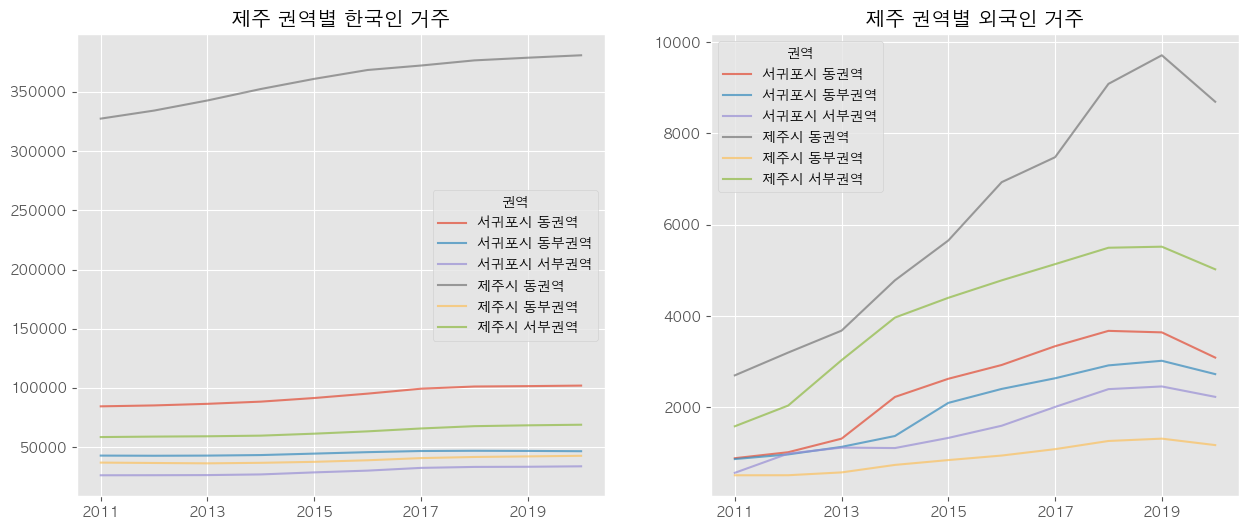

In [246]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
df.T.plot(
    kind='line',
    stacked=False,
    alpha=0.7, # 투명도
    ax=ax1,
    title='제주 권역별 한국인 거주'
)

df2.T.plot(
    kind='line',
    stacked=False,
    alpha=0.7, # 투명도
    ax=ax2,
    title='제주 권역별 외국인 거주'
)

plt.show()

In [234]:
tourists = jeju_total.copy()

In [241]:
tourists['년'] = tourists['index'].str[0:4]

In [242]:
tourists.groupby('년').sum()

,서귀포시 동권역,서귀포시 동부권역,서귀포시 서부권역,제주시 동권역,제주시 동부권역,제주시 서부권역
년,,,,,,
2019,24729554,16143353,10619435,46483885,14914249,16943041
2020,18980118,11309622,8530337,35928790,11290112,14828634
2021,26380546,15264008,12485843,48232983,15287585,21273628
2022,30434590,18235814,15178027,54410954,17838852,24042424


In [245]:
tourists[tourists['년'].isin(['2019','2020'])].groupby('년').sum()

,서귀포시 동권역,서귀포시 동부권역,서귀포시 서부권역,제주시 동권역,제주시 동부권역,제주시 서부권역
년,,,,,,
2019,24729554,16143353,10619435,46483885,14914249,16943041
2020,18980118,11309622,8530337,35928790,11290112,14828634


In [357]:
local_count = pd.read_csv("../JejuData/내국인관광지입장객수추이.csv",encoding='euc-kr')
local_count

,날짜,관광지명,관광객수
0,2009.01,(주)제주미니미니랜드,11484
1,2009.01,국립제주박물관,26913
2,2009.01,도립미술관,0
3,2009.01,만장굴관광지,32019
4,2009.01,목석원,4169
...,...,...,...
6727,2019.12,카멜리아힐,64255
6728,2019.12,테디베어뮤지엄,0
6729,2019.12,퍼시픽랜드,0
6730,2019.12,아쿠아플라넷,60363


In [ ]:
# local_count.style.set_precision(2)